In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
sys.path.append('/Users/libing/codes/woe-encoder/')
# sys.path.append('/Users/bingli/codes/woe-encoder/')

In [3]:
from woe_encoder import CategoryWOEEncoder
from woe_encoder import ContinuousWOEEncoder

In [4]:
from sklearn.datasets import load_boston

bunch = load_boston()
data = pd.DataFrame(bunch.data, columns=bunch.feature_names)
y = bunch.target > 22.5
data['y'] = y

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,True
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,True
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,True
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,True


In [5]:
categorical_features = ['CHAS', 'RAD' ]
continuous_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',
                       'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [6]:
cat_col_iv= {}
for col in categorical_features:
    encoder = CategoryWOEEncoder(
        col_name=col, target_col_name='y',
        bin_pct_threshold=0.05,
        woe_method='chi2', min_chi2_flag=True)
    encoder.fit(data)
    cat_col_iv[col] = encoder.iv_

In [7]:
con_col_iv= {}
for col in continuous_features:
    encoder = ContinuousWOEEncoder(
        col_name=col, target_col_name='y',
        max_bins=10, bin_pct_threshold=0.05,
        woe_method='chi2', min_chi2_flag=False)
    encoder.fit(data)
    con_col_iv[col] = encoder.iv_

In [8]:
from woe_encoder import plot_ivs

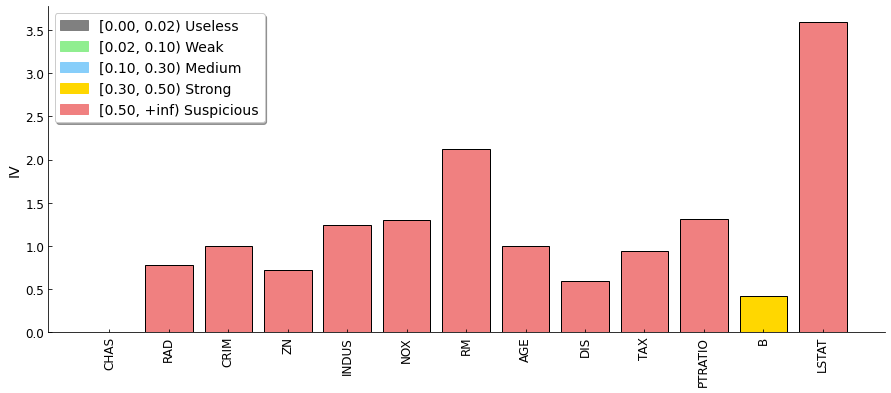

In [9]:
plot_ivs({**cat_col_iv, **con_col_iv})

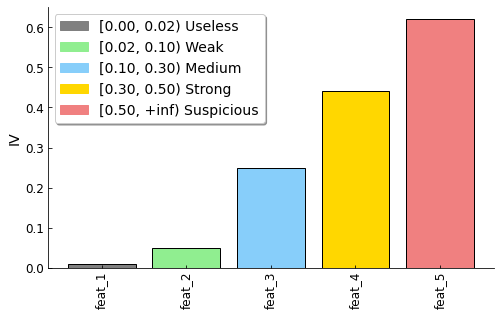

<Figure size 432x288 with 0 Axes>

In [12]:
col_ivs = {
    'feat_1': 0.01,
    'feat_2': 0.05,
    'feat_3': 0.25,
    'feat_4': 0.44,
    'feat_5': 0.62}
plot_ivs(col_ivs, figsize=(8, 4.8))
plt.savefig('../figs/iv.png')